In [1]:
import numpy as nm
from sfepy.discrete.fem import Mesh, FEDomain, Field

In [11]:
from sfepy.scripts import convert_mesh



In [64]:
!python '/Users/theobourdais/miniconda3/envs/PDE/lib/python3.11/site-packages/sfepy/scripts/convert_mesh.py' -2 '/Users/theobourdais/Desktop/Caltech/Research/model_aggregation/ModelAggregation/PDEsolvers/simple_mesh.mesh' '/Users/theobourdais/Desktop/Caltech/Research/model_aggregation/ModelAggregation/PDEsolvers/simple_mesh.mesh'

sfepy: reading mesh (/Users/theobourdais/Desktop/Caltech/Research/model_aggregation/ModelAggregation/PDEsolvers/simple_mesh.mesh)...
sfepy:   number of vertices: 230
sfepy:   number of cells:
sfepy:     1_2: 52
sfepy:     2_3: 406
sfepy: ...done in 0.00 s
sfepy: writing /Users/theobourdais/Desktop/Caltech/Research/model_aggregation/ModelAggregation/PDEsolvers/simple_mesh.mesh...
sfepy: ...done


In [16]:
mesh = Mesh.from_file('new_square_2.mesh')

sfepy:               reading mesh (new_square_2.mesh)...
sfepy:                 number of vertices: 142
sfepy:                 number of cells:
sfepy:                   2_3: 242
sfepy:               ...done in 0.00 s


In [17]:
domain = FEDomain('domain', mesh)

In [32]:
min_x, max_x = domain.get_mesh_bounding_box()[:, 0]
eps = 1e-8 * (max_x - min_x)
omega = domain.create_region('Omega', 'all')
gamma1 = domain.create_region('Gamma1',
                              'vertices in x < %.10f' % (min_x + eps),
                              'facet')
gamma2 = domain.create_region('Gamma2',
                              'vertices in x > %.10f' % (max_x - eps),
                              'facet')

In [33]:
'vertices in x > %.10f' % (max_x - eps)

'vertices in x > 0.9999999900'

In [34]:
gamma2.vertices

array([ 2,  3, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype=uint32)

In [30]:
omega.cells

array([  0,   1,   2, ..., 239, 240, 241], dtype=uint32)

In [35]:
field = Field.from_args('fu', nm.float64, 'vector', omega,
                                             approx_order=2)

<meshio mesh object>
  Number of points: 11831
  Number of cells:
    line: 400
    triangle: 23260
  Point data: medit:ref
  Cell data: medit:ref

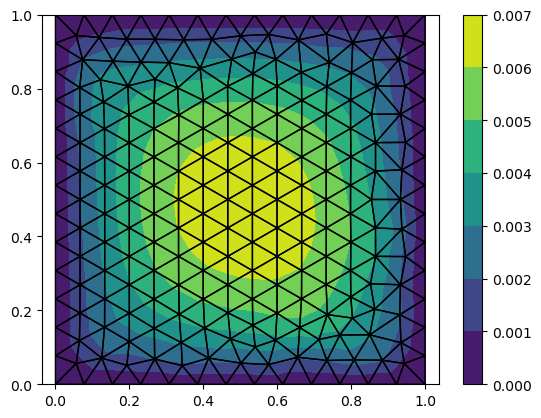

In [74]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import meshio
mesh = meshio.read('simple_mesh.vtk')
m=meshio.read('simple_mesh.mesh')

# converts quad elements into tri elements
def quads_to_tris(quads):
    tris = [[None for j in range(3)] for i in range(2*len(quads))]
    for i in range(len(quads)):
        j = 2*i
        n0 = quads[i][0]
        n1 = quads[i][1]
        n2 = quads[i][2]
        n3 = quads[i][3]
        tris[j][0] = n0
        tris[j][1] = n1
        tris[j][2] = n2
        tris[j + 1][0] = n2
        tris[j + 1][1] = n3
        tris[j + 1][2] = n0
    return tris

# plots a finite element mesh
def plot_fem_mesh(nodes_x, nodes_y, elements):
    for element in elements:
        x = [nodes_x[element[i]] for i in range(len(element))]
        y = [nodes_y[element[i]] for i in range(len(element))]
        plt.fill(x, y, edgecolor='black', fill=False)

# FEM data
nodes_x = mesh.points[:,0]
nodes_y = mesh.points[:,1]
nodal_values = mesh.point_data['p']
elements_tris = m.cells[0][1]
elements_quads = []#[[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 8, 7], [4, 5, 9, 8]]
elements = elements_tris# + elements_quads

# convert all elements into triangles
elements_all_tris = elements_tris# + quads_to_tris(elements_quads)

# create an unstructured triangular grid instance
triangulation = tri.Triangulation(nodes_x, nodes_y, elements_all_tris)

# plot the finite element mesh

# plot the contours
plt.tricontourf(triangulation, nodal_values)

plot_fem_mesh(nodes_x, nodes_y, elements)

# show
plt.colorbar()
plt.axis('equal')
plt.show()

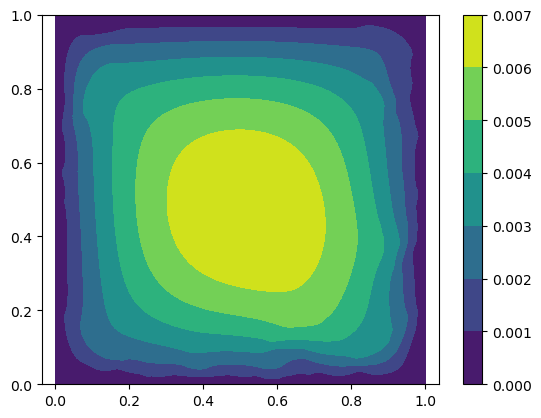

In [76]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import meshio
mesh = meshio.read('finer_mesh_2.vtk')
m=meshio.read('finer_mesh_2.mesh')

# converts quad elements into tri elements
def quads_to_tris(quads):
    tris = [[None for j in range(3)] for i in range(2*len(quads))]
    for i in range(len(quads)):
        j = 2*i
        n0 = quads[i][0]
        n1 = quads[i][1]
        n2 = quads[i][2]
        n3 = quads[i][3]
        tris[j][0] = n0
        tris[j][1] = n1
        tris[j][2] = n2
        tris[j + 1][0] = n2
        tris[j + 1][1] = n3
        tris[j + 1][2] = n0
    return tris

# plots a finite element mesh
def plot_fem_mesh(nodes_x, nodes_y, elements):
    for element in elements:
        x = [nodes_x[element[i]] for i in range(len(element))]
        y = [nodes_y[element[i]] for i in range(len(element))]
        plt.fill(x, y, edgecolor='black', fill=False)

# FEM data
nodes_x = mesh.points[:,0]
nodes_y = mesh.points[:,1]
nodal_values = mesh.point_data['p']
elements_tris = m.cells[0][1]
elements_quads = []#[[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 8, 7], [4, 5, 9, 8]]
elements = elements_tris# + elements_quads

# convert all elements into triangles
elements_all_tris = elements_tris# + quads_to_tris(elements_quads)

# create an unstructured triangular grid instance
triangulation = tri.Triangulation(nodes_x, nodes_y, elements_all_tris)

# plot the finite element mesh

# plot the contours
plt.tricontourf(triangulation, nodal_values)

#plot_fem_mesh(nodes_x, nodes_y, elements)

# show
plt.colorbar()
plt.axis('equal')
plt.show()

In [68]:
m.cells[0][0]


'triangle'

In [57]:
m.cells[1][1]

array([[  532,  7851,   115],
       [  453,  9094,  6902],
       [  456,  8906,  6842],
       ...,
       [ 6838, 11828, 11641],
       [ 8926, 11820, 11637],
       [11708, 11829,   550]])

In [58]:
m.cells[0][0]

'line'